# Duckie Example

An example of how to use Duckie - a testing framework for ML algorithms.


In [1]:
# to get the iris data
from sklearn.datasets import load_iris

# for data handling 
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from duckie.mloutput_assessments import ConfusionMatrixAssessment

## Example Classification Problem

In [3]:
## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'],columns = ['sepal_length','sepal_width','petal_length','petal_width'])

## Create a virginica variable
## this will be our target
iris_df['virginica'] = 0 
iris_df.loc[iris['target'] == 2,'virginica'] = 1

X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()
y = iris_df['virginica'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=111)

In [6]:
## import Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [7]:
## Make the model object
knn = KNeighborsClassifier(n_neighbors = 5)

## Fit the model object
knn.fit(X_train,y_train)

## get the predictions
y_test_pred = knn.predict(X_test)

In [8]:
## now we can import the confusion matrix
## function from sklearn
from sklearn.metrics import confusion_matrix

In [9]:
# Calculate the confusion matrix here
knn_confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [10]:
knn_confusion_matrix

array([[7, 0],
       [1, 7]])

In [11]:
# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
## Make the model object
rfc = RandomForestClassifier()

## Fit the model object
rfc.fit(X_train,y_train)

## get the predictions
y_test_pred = rfc.predict(X_test)

In [13]:
rfc_confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [14]:
rfc_confusion_matrix

array([[6, 1],
       [1, 7]])

## Confusion Matrix Assessment

In [15]:
mats = [knn_confusion_matrix, rfc_confusion_matrix]

In [16]:
cma = ConfusionMatrixAssessment(mats,model_names=['KNN','RandomForest'])

### Summary Data

In [17]:
summary_data = cma.summarize()

In [18]:
summary_data

,Model Name,precision,recall,f1_score
0,KNN,1.000,0.875,0.933333
1,RandomForest,0.875,0.875,0.875000


In [19]:
summary_data['precision'].values[0]

1.0

### Output Distribution Data 

In [20]:
cma.model_names

['KNN', 'RandomForest']

In [21]:
distribution_data = cma.distribute()

In [22]:
distribution_data

,Model Name,category,counts,fractions,percentages
0,KNN,TN,7,0.466667,46.666667
1,KNN,FP,0,0.000000,0.000000
2,KNN,FN,1,0.066667,6.666667
3,KNN,TP,7,0.466667,46.666667
4,RandomForest,TN,6,0.400000,40.000000
5,RandomForest,FP,1,0.066667,6.666667
6,RandomForest,FN,1,0.066667,6.666667
7,RandomForest,TP,7,0.466667,46.666667


### Confusion Matrix

In [23]:
# cmap='greens'}

In [24]:
import matplotlib 
matplotlib.rc('font', size=20) 

In [25]:
cma.model_names

['KNN', 'RandomForest']

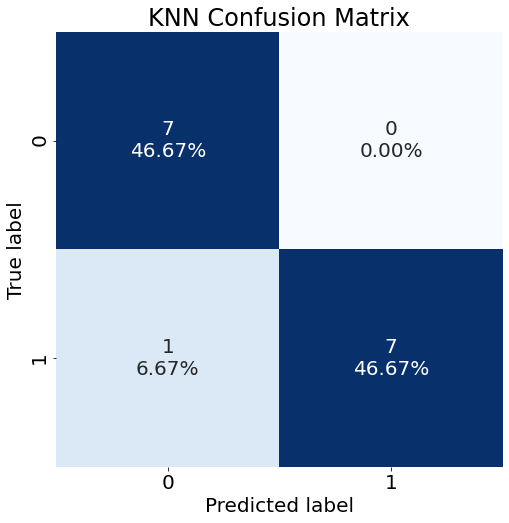

<Figure size 432x288 with 0 Axes>

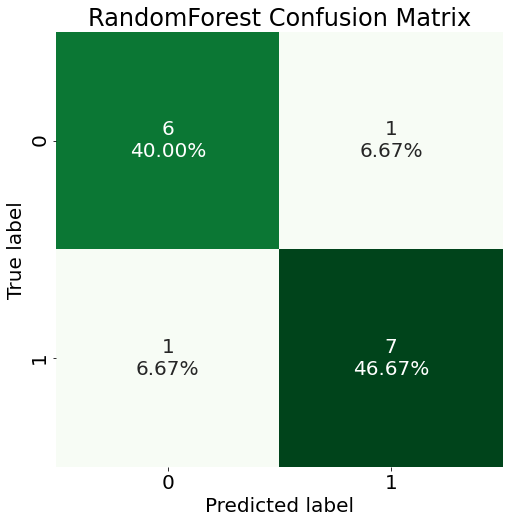

<Figure size 432x288 with 0 Axes>

In [26]:
# save_name, title, sns.heatmap args
cma.plot(cmap=['Blues','Greens'])

## TrainTestStratAssessment

In [27]:
from duckie.mlinput_assessments import TrainTestStratAssessment

Checking what happens when we don't stratify our test / train data.

In [28]:
len(iris_df['virginica'])

150

In [29]:
train = iris_df[['virginica']][0:50]
test = iris_df[['virginica']][50:]

In [30]:
ttsa = TrainTestStratAssessment(train,test,['virginica'])

Good, we get a warning as we should!

In [31]:
norm_counts_train_full, norm_counts_test_full = ttsa.assess()

Checking feature virginica.
Training sample is 100.00%                     0 for feature virginica.
Test sample is 50.00%                     1: for feature virginica.
Test sample is 50.00%                     0: for feature virginica.


/Users/Emily/Desktop/duckie/duckie/mlinput_assessments.py:48: UserWarning: Warning! There are 1 feature types of                     feature virginica in the training data, but there are 2                    feature types of virginica in the test data!
  warnings.warn(warning_text)


In [32]:
norm_counts_test_full

[1    0.5
 0    0.5
 Name: virginica, dtype: float64]

In [33]:
norm_counts_train_full

[0    1.0
 Name: virginica, dtype: float64]

In [34]:
np.unique(test['virginica'])

array([0, 1])

In [35]:
np.unique(train['virginica'])

array([0])

Checking what happens when we stratify our test data.

In [36]:
x = iris_df['virginica'].to_numpy()

In [37]:
train, test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=111,
                                                    stratify=y)

In [38]:
y_train = pd.DataFrame({'virginica':y_train})
y_test = pd.DataFrame({'virginica':y_test})

In [39]:
ttsa = TrainTestStratAssessment(y_train,y_test,['virginica'])

In [40]:
norm_counts_test_full, norm_counts_train_full = ttsa.assess()

Checking feature virginica.
Training sample is 66.67%                     0 for feature virginica.
Training sample is 33.33%                     1 for feature virginica.
Test sample is 66.67%                     0: for feature virginica.
Test sample is 33.33%                     1: for feature virginica.
